In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from scipy.stats import mannwhitneyu, ttest_ind, pearsonr

In [27]:
dataset=pd.read_csv('general_data.csv')
dataset.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [11]:
dataset.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [12]:
dataset.isnull()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4406,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4407,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4408,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
dataset.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [15]:
dataset.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4405    False
4406    False
4407    False
4408    False
4409    False
Length: 4410, dtype: bool

In [17]:
dataset.drop_duplicates()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8


In [24]:
dataset1=dataset[['Age','DistanceFromHome','Education','MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']]

In [48]:
dataset1.describe()

,Age,DistanceFromHome,Education,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,65029.312925,2.694830,15.209524,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,47068.888559,2.498887,3.659108,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,29110.000000,1.000000,12.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,49190.000000,2.000000,14.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,83800.000000,4.000000,18.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,199990.000000,9.000000,25.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [26]:
dataset1.median()

Age                           36.0
DistanceFromHome               7.0
Education                      3.0
MonthlyIncome              49190.0
NumCompaniesWorked             2.0
PercentSalaryHike             14.0
TotalWorkingYears             10.0
TrainingTimesLastYear          3.0
YearsAtCompany                 5.0
YearsSinceLastPromotion        1.0
YearsWithCurrManager           3.0
dtype: float64

In [27]:
dataset1.mode()

,Age,DistanceFromHome,Education,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,35,2,3,23420,1.0,11,10.0,2,5,0,2


In [31]:
dataset1.mean()

Age                           36.923810
DistanceFromHome               9.192517
Education                      2.912925
MonthlyIncome              65029.312925
NumCompaniesWorked             2.694830
PercentSalaryHike             15.209524
TotalWorkingYears             11.279936
TrainingTimesLastYear          2.799320
YearsAtCompany                 7.008163
YearsSinceLastPromotion        2.187755
YearsWithCurrManager           4.123129
dtype: float64

In [28]:
dataset1.var()

Age                        8.341719e+01
DistanceFromHome           6.569144e+01
Education                  1.048438e+00
MonthlyIncome              2.215480e+09
NumCompaniesWorked         6.244436e+00
PercentSalaryHike          1.338907e+01
TotalWorkingYears          6.056298e+01
TrainingTimesLastYear      1.661465e+00
YearsAtCompany             3.751728e+01
YearsSinceLastPromotion    1.037935e+01
YearsWithCurrManager       1.272582e+01
dtype: float64

In [29]:
dataset1.skew()

Age                        0.413005
DistanceFromHome           0.957466
Education                 -0.289484
MonthlyIncome              1.368884
NumCompaniesWorked         1.026767
PercentSalaryHike          0.820569
TotalWorkingYears          1.116832
TrainingTimesLastYear      0.552748
YearsAtCompany             1.763328
YearsSinceLastPromotion    1.982939
YearsWithCurrManager       0.832884
dtype: float64

In [29]:
dataset1.skew()

Age                        0.413005
DistanceFromHome           0.957466
Education                 -0.289484
MonthlyIncome              1.368884
NumCompaniesWorked         1.026767
PercentSalaryHike          0.820569
TotalWorkingYears          1.116832
TrainingTimesLastYear      0.552748
YearsAtCompany             1.763328
YearsSinceLastPromotion    1.982939
YearsWithCurrManager       0.832884
dtype: float64

# SKEWNESS is positive 

In [49]:
dataset1.std()

Age                            9.133301
DistanceFromHome               8.105026
Education                      1.023933
MonthlyIncome              47068.888559
NumCompaniesWorked             2.498887
PercentSalaryHike              3.659108
TotalWorkingYears              7.782222
TrainingTimesLastYear          1.288978
YearsAtCompany                 6.125135
YearsSinceLastPromotion        3.221699
YearsWithCurrManager           3.567327
dtype: float64

In [30]:
dataset1.kurt()

Age                       -0.405951
DistanceFromHome          -0.227045
Education                 -0.560569
MonthlyIncome              1.000232
NumCompaniesWorked         0.007287
PercentSalaryHike         -0.302638
TotalWorkingYears          0.912936
TrainingTimesLastYear      0.491149
YearsAtCompany             3.923864
YearsSinceLastPromotion    3.601761
YearsWithCurrManager       0.167949
dtype: float64

# LeptoKurtic -->  Age / DistanceFromHome / Education     & PlatyKurtic --> MonthlyIncome / TotalWorkingYear / YearsAtCompany, etc.

# Plotting Boxplot

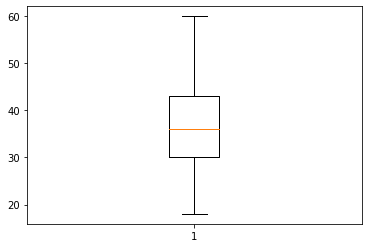

In [34]:
box=plt.boxplot(dataset1.Age)  # No major outliers found in AGE

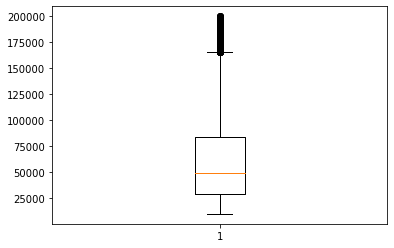

In [36]:
box=plt.boxplot(dataset1.MonthlyIncome)  

# Major Outliers found in MonthlyIncome      Monthly Income IQR near 50K suggests attrition across all income bands throughout company

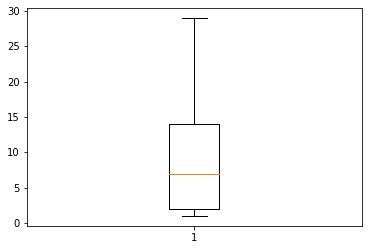

In [40]:
box=plt.boxplot(dataset1.DistanceFromHome)   # No Major Ourliers found in DistanceFromHome

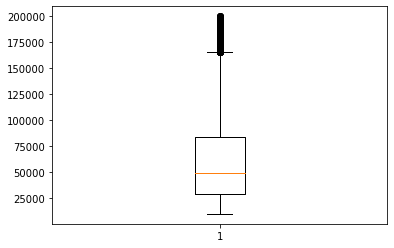

In [42]:
box=plt.boxplot(dataset1.MonthlyIncome)   # Major Ourliers found in MonthlyIncome

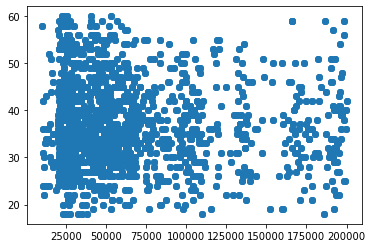

In [45]:
scatter=plt.scatter(dataset1.MonthlyIncome, dataset1.Age)   # No Major regression found

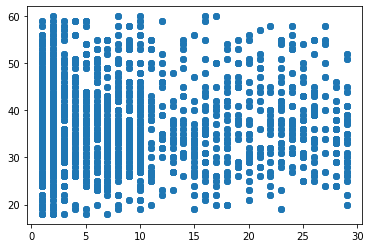

In [46]:
scatter=plt.scatter(dataset1.DistanceFromHome, dataset1.Age)   # No Major regression found

(array([[10.,  0.,  0., ...,  0.,  0.,  0.],
        [10.,  0.,  1., ...,  0.,  0.,  0.],
        [10.,  0.,  0., ...,  0.,  0.,  1.],
        ...,
        [10.,  1.,  0., ...,  0.,  0.,  0.],
        [10.,  1.,  0., ...,  0.,  0.,  0.],
        [ 9.,  0.,  1., ...,  0.,  0.,  0.]]),
 array([     0.,  19999.,  39998.,  59997.,  79996.,  99995., 119994.,
        139993., 159992., 179991., 199990.]),
 <a list of 4410 Lists of Patches objects>)

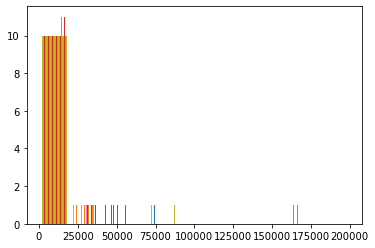

In [59]:
plt.hist(dataset1)

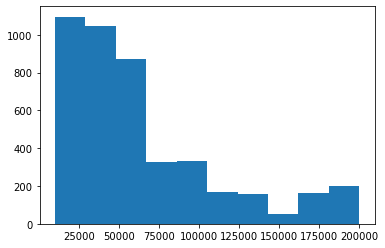

In [52]:
hist=plt.hist(dataset1.MonthlyIncome)         # Major Outliers found

In [28]:
df2 = dataset[['Attrition', 'DistanceFromHome', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsWithCurrManager']]

In [29]:
df2.head()

,Attrition,DistanceFromHome,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsWithCurrManager
0,No,6,131160,1.0,1,0
1,Yes,10,41890,6.0,5,4
2,No,17,193280,5.0,5,3
3,No,2,83210,13.0,8,5
4,No,10,23420,9.0,6,4


In [31]:
df_attr_yes = df2[df2.Attrition == 'Yes']
df_attr_no = df2[df2.Attrition == 'No']

In [32]:
display(df_attr_yes.head())
display(df_attr_no.head())

,Attrition,DistanceFromHome,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsWithCurrManager
1,Yes,10,41890,6.0,5,4
6,Yes,11,58130,5.0,0,0
13,Yes,1,57620,10.0,10,9
28,Yes,1,103330,19.0,1,0
30,Yes,4,68540,5.0,3,2


,Attrition,DistanceFromHome,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsWithCurrManager
0,No,6,131160,1.0,1,0
2,No,17,193280,5.0,5,3
3,No,2,83210,13.0,8,5
4,No,10,23420,9.0,6,4
5,No,8,40710,28.0,7,7


In [16]:
def mannWhitneyu(df_temp1, df_temp2):
    for col in df_temp1.columns[1:]:
        print(f'Attrition & {col}')
        stat, p = mannwhitneyu(df_temp1[col], df_temp2[col])
        print(stat, p)
        check(p)

def ttestInd(df_temp1, df_temp2):
    for col in df_temp1.columns[1:]:
        print(f'Attrition & {col}')
        stat, p = ttest_ind(df_temp2[col], df_temp1[col])
        print(stat, p)
        check(p)

def Pearsonr(df_temp1):
    df_temp = df2.copy()
    df_temp.Attrition.replace(to_replace = ('No','Yes'),value = (0,1),inplace = True)
    for col in df2.columns[1:]:
        print(f'Attrition & {col}')
        stat, p = pearsonr(df_temp['Attrition'], df_temp1[col])
        print(stat, p)
        check(p)

def check(p):
        if p < 0.05:
            print(f'As the p value is 0.0, which is < than 0.05, the H0 is rejected and Ha is accepted\n')
        else:
            print(f'As the p value is > than 0.05, the H0 is accepted and Ha is rejected\n')

In [33]:
print('mannwhitneyu:\n')
mannWhitneyu(df_attr_yes, df_attr_no)

mannwhitneyu:

Attrition & DistanceFromHome
1312110.0 0.4629185205822659
As the p value is > than 0.05, the H0 is accepted and Ha is rejected

Attrition & MonthlyIncome
1264900.5 0.053577283839938566
As the p value is > than 0.05, the H0 is accepted and Ha is rejected

Attrition & TotalWorkingYears
909954.0 2.8897554531400447e-39
As the p value is 0.0, which is < than 0.05, the H0 is rejected and Ha is accepted

Attrition & YearsAtCompany
923238.0 6.047598261692858e-37
As the p value is 0.0, which is < than 0.05, the H0 is rejected and Ha is accepted

Attrition & YearsWithCurrManager
957253.5 1.2365483142169853e-31
As the p value is 0.0, which is < than 0.05, the H0 is rejected and Ha is accepted



In [37]:
print('ttest_ind:\n')
ttestInd(df_attr_yes, df_attr_no)

ttest_ind:

Attrition & DistanceFromHome
0.6460416038042738 0.518286042805572
As the p value is > than 0.05, the H0 is accepted and Ha is rejected

Attrition & MonthlyIncome
2.0708863763619316 0.03842748490605113
As the p value is 0.0, which is < than 0.05, the H0 is rejected and Ha is accepted

Attrition & TotalWorkingYears
nan nan
As the p value is > than 0.05, the H0 is accepted and Ha is rejected

Attrition & YearsAtCompany
9.004357011787226 3.163883122491456e-19
As the p value is 0.0, which is < than 0.05, the H0 is rejected and Ha is accepted

Attrition & YearsWithCurrManager
10.499379408703438 1.7339322652918153e-25
As the p value is 0.0, which is < than 0.05, the H0 is rejected and Ha is accepted



In [39]:
print('pearsonr:\n')
Pearsonr(df2)

pearsonr:

Attrition & DistanceFromHome
-0.00973014101017966 0.5182860428050771
As the p value is > than 0.05, the H0 is accepted and Ha is rejected

Attrition & MonthlyIncome
-0.031176281698115007 0.03842748490600132
As the p value is 0.0, which is < than 0.05, the H0 is rejected and Ha is accepted

Attrition & TotalWorkingYears


ValueError: array must not contain infs or NaNs

In [41]:
df3 = dataset.copy()                   # Encoding
df3.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeID                   int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

In [42]:
enc = LabelEncoder()                # Lable encoding simply assign numeric values to different categories starting from 0

def encode(cols):
    for col in cols:
        df3[col] = enc.fit_transform(df3[col])

In [43]:
encode(df3.select_dtypes(include=['object']).columns)
df3.dtypes

Age                          int64
Attrition                    int32
BusinessTravel               int32
Department                   int32
DistanceFromHome             int64
Education                    int64
EducationField               int32
EmployeeCount                int64
EmployeeID                   int64
Gender                       int32
JobLevel                     int64
JobRole                      int32
MaritalStatus                int32
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                       int32
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

In [45]:
def dropCol(df_temp):                                #Droping columns that have constant value
    for col in df_temp.columns:
        if len(df_temp[col].unique()) == 1:
            print(col, ': ', df_temp[col].unique())
            df_temp.drop(col, axis = 1, inplace = True)
    return df_temp

In [46]:
df3 = dropCol(df3)
df3.columns

EmployeeCount :  [1]
Over18 :  [0]
StandardHours :  [8]


Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeID', 'Gender', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

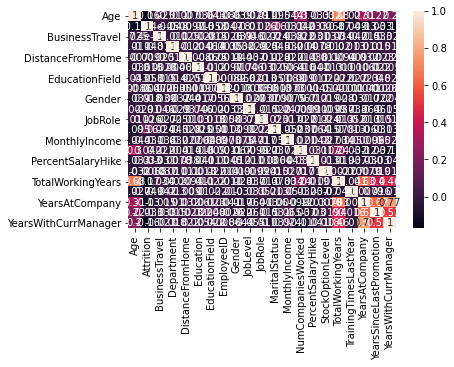

In [52]:
corrMatrix=df3.corr()                  # Creating & Ploting Correlation MAtrix
sns.heatmap(corrMatrix, annot=True)
plt.show()